## load neccesary  libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 


## Line graph (loading data)

[]

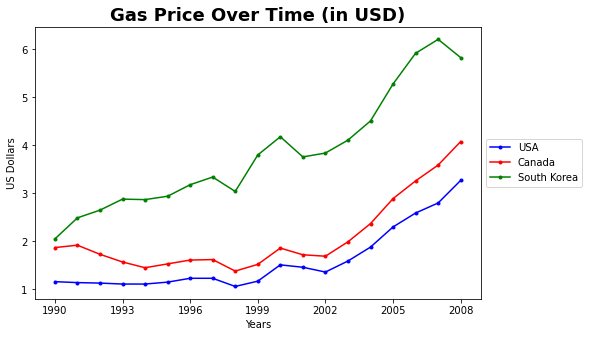

In [42]:
gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(8,5))

plt.title('Gas Price Over Time (in USD)', fontdict={'fontweight':'bold','fontsize':18})

#gas.year(Y-axis), gas.countries(x-axis)

plt.plot(gas.Year,gas.USA, 'b.-', label ='USA')
plt.plot(gas.Year, gas.Canada,'r.-', label ='Canada')
plt.plot(gas.Year, gas['South Korea'],'g.-', label ='South Korea') # use this syntax for two entries 

#A FUNCTION THAT WILL PLOT ALL THE COUNTRY.
#for country in gas:
    #if country != 'Year':
        #plt.plot(gas.Year, gas[country], marker='.', label=country)
        

#ANOTHER WAY TO CALL SPECIFIC COUNTRIES
#countries_to_look_at = ['Australia', 'USA', 'Canada', 'South Korea']
#for country in gas:
    #if country in countries_to_look_at:
            #plt.plot(gas.Year, gas[country], marker='.', label=country)
        

#the the ticks skeep every three year on the X-axis. the tolist() add 2011 at the end
plt.xticks(gas.Year[::3].tolist()+[2011])

plt.xlabel('Years')
plt.ylabel('US Dollars')

#the code inaside moves legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('gas_prices_figure.png', dpi = 300)


plt.plot()


### Load Fifa Data

In [44]:
fifa = pd.read_csv('fifa_data.csv')

fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Histograms

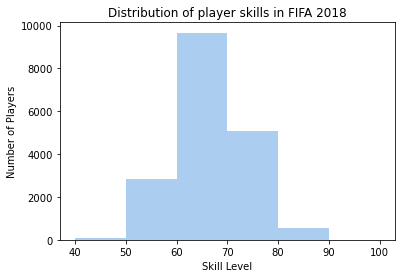

In [50]:
bins = [40,50,60,70,80,90,100]

plt.hist(fifa.Overall,bins=bins, color='#abcdef')

plt.xticks(bins)

plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.title('Distribution of player skills in FIFA 2018')

plt.savefig('Distribution_of_playes.png', dpi = 300)

plt.show()

### Pie charts

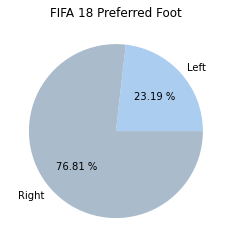

In [63]:
#Filter out the preferred foot from the data

left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

labels = ['Left', 'Right']
colors = ['#abcdef', '#aabbcc']

plt.pie([left,right], labels=labels, colors=colors, autopct='%.2f %%')

plt.title('FIFA 18 Preferred Foot')

plt.savefig('Preferred_foot.png', dpi = 200)

plt.show()

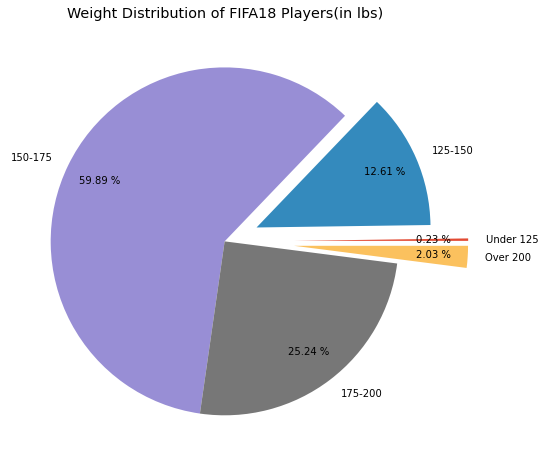

In [99]:
#REMOVING THE lbs in the weight

fifa.Weight = [int(x.strip('lbs')) if type(x) == str else x for x in  fifa.Weight]


#change plot style 
plt.style.use('ggplot')


plt.figure(figsize=(10,8))

#group weight range
light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium  = fifa.loc[(fifa.Weight>= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa[(fifa.Weight >= 200)].count()[0]

weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Under 125', '125-150', '150-175', '175-200',  'Over 200' ]
explode = [.4, .2, .0, .0, .4]

plt.title('Weight Distribution of FIFA18 Players(in lbs)')

plt.pie(weights,labels=labels, autopct='%.2f %%', pctdistance=0.8, explode=explode)

plt.savefig('Player_Weight.png')

plt.show()

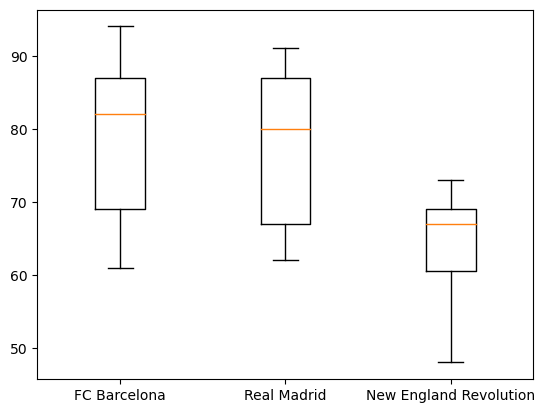

In [118]:
# pie boxplot club comparison

plt.style.use('default')

barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
revs = fifa.loc[fifa.Club == 'New England Revolution']['Overall']


labels = ['FC Barcelona', 'Real Madrid', 'New England Revolution']

plt.boxplot([barcelona,madrid,revs],labels=labels)

plt.title('Professional Soccer Team Rating')
plt.ylabel('FIFA Overall Rating')
plt.show()